<a href="https://colab.research.google.com/github/niteshgajakosh/yes-Bank-Stock-Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**


Yes Bank Limited is an Indian private sector bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004. It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it.

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **Importing requrired Libraries**

In [1]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data_YesBank_StockPrices.csv")

In [4]:
# First gothrough dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Data description**

Dataset contains **Yes Bank stock monthly prices** since it listed on stock exchange.

Following are its features:-

**Date**: In our data its monthly observation of stock since it listed.

**Open**: The price a stock when the stock exchange open for the day.

**High**: The maximum price of a stock attain during given period of time.

**Low**: The minimum price of a stock attain during given period of time.

**Close**: The price of a stock when the stock exchange closed for the day.

# **Data Preprocessing**

In [5]:
#first look of data
df.head(5)  # first 5 rows

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# last 5 rows
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Yes bank stock listed on **month of july 2005**.

we have data available from **july 2005 to november 2020**

In [7]:
#Lets have look at shape of data
df.shape

(185, 5)

In [8]:
# details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Need to change Date column to datetime.

seems like **no missing value** in above data.

In [9]:
#print the unique value
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [10]:
#Summary of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Missing values

**Chekcing for missing values**

In [11]:
df.isnull().mean()

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

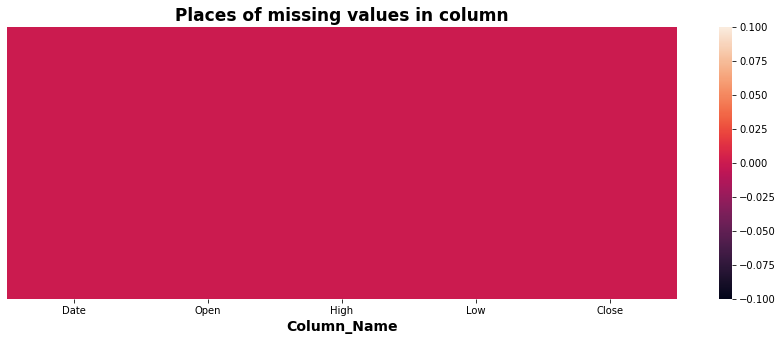

In [12]:
# No missin Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**As we can see above there are no missing value presents thankfully**

# Duplicate values

**Why is it important to remove duplicate records from my data?**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.***

In [13]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**

# Changing data type to required format

In [14]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [15]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Checking datatype again**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


-----YES!!! datatype change into reqiured format

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.


# **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**

we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.

Our dependent variable is **"Close Price"** so we need to analysis this column with the other columns by using some visualisation plot

!!! now its time to visualise things.

firstly will see how **closing price** change with given **time**

# Time

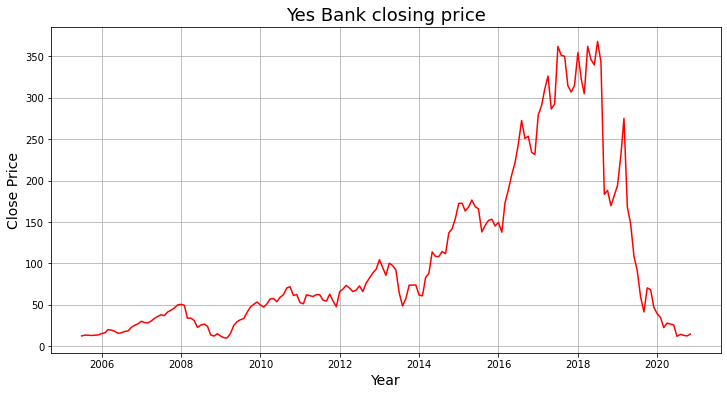

In [17]:
#Ploting close price of stock vs time
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price' ,fontsize=14)
plt.plot(df['Date'], df['Close'] , color="red")
plt.title('Yes Bank closing price', fontsize=18)

plt.show()

After **2018** yes bank stock price **fall** beacuse of fraud case regarding to **Rana kapoor**

# VIsualize all close,high,open and low price of stock

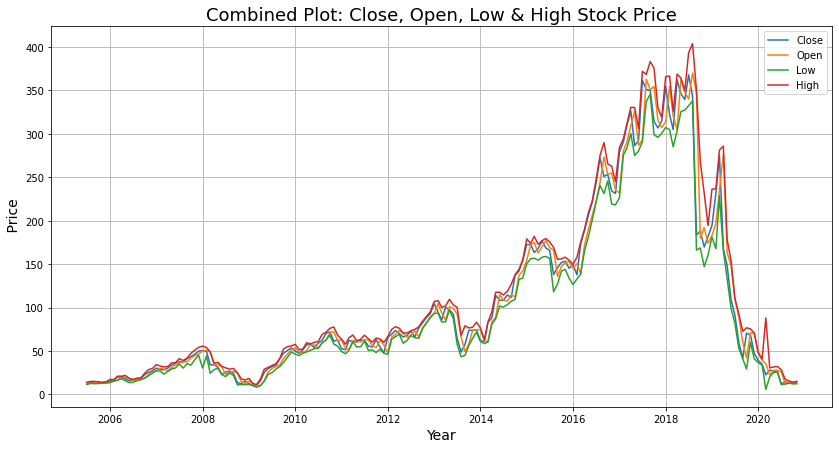

In [18]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel(' Price' ,fontsize=14)
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=18)
plt.show()

we can see in **2017 to 2019** there can be high action seen because of difference in high and low lines.

Closing price of stock price is always important so i take **close price as dependent variable**

# **Distribution of dependant variable Close Price of stock.**

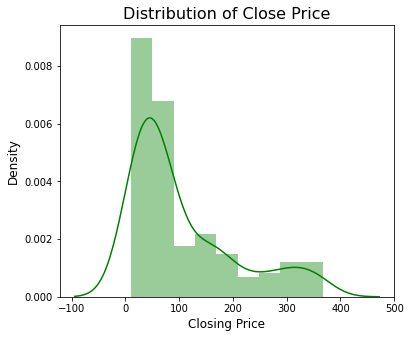

In [19]:
# Now will see distribution of close price to know about normal distribution
# i use distplot for that
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='green')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is **rightly skewed distribution.**

need to go with **log transformation** to make it normal distribution

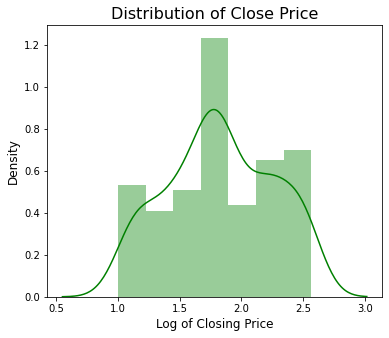

In [20]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='green')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Now it seems more normal

# **Analyze of Numerical variables**

**What is Numerical Data**

Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. 

In [21]:
df.describe().columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [22]:
# List of independent features
numerical_features = list(set(df.describe().columns)-{'Close'})
numerical_features

['Open', 'Low', 'High']

<function matplotlib.pyplot.show>

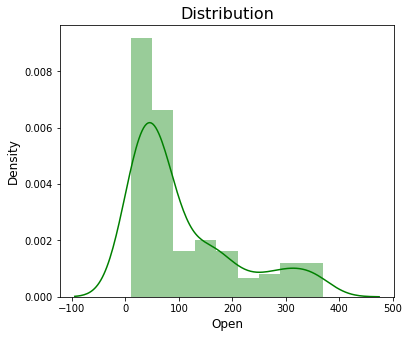

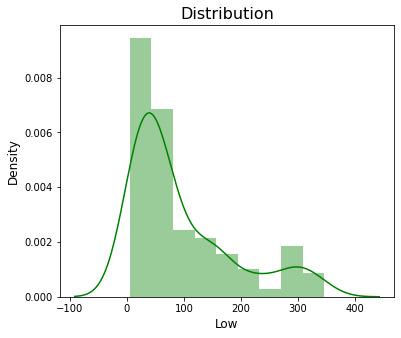

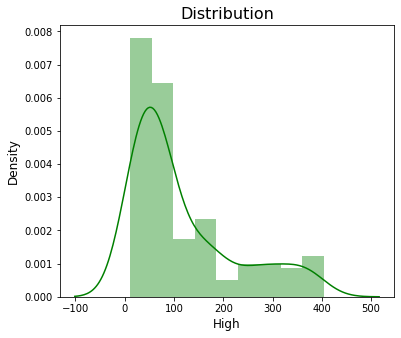

In [23]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

It looks all **numerical features** are **rightly skewed.**

Apply log transformation to make normal.

<function matplotlib.pyplot.show>

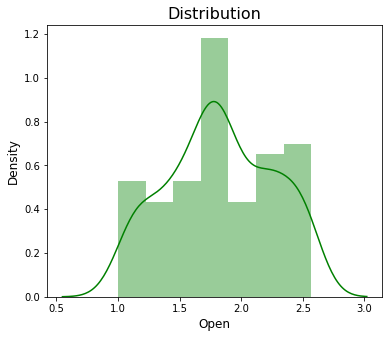

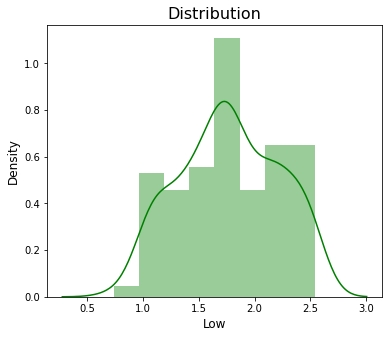

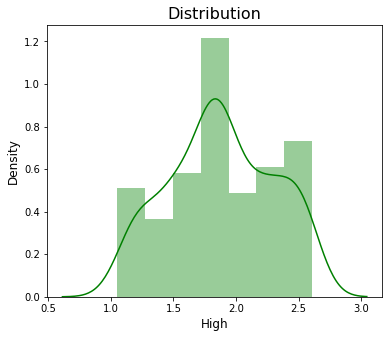

In [24]:
# Applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

Now looks like **normally distrubuted**

# **Regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.

 Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

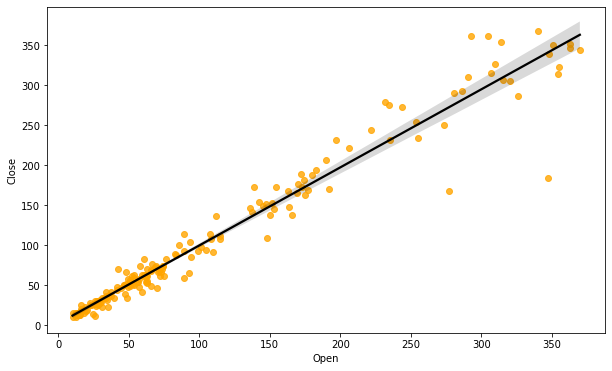

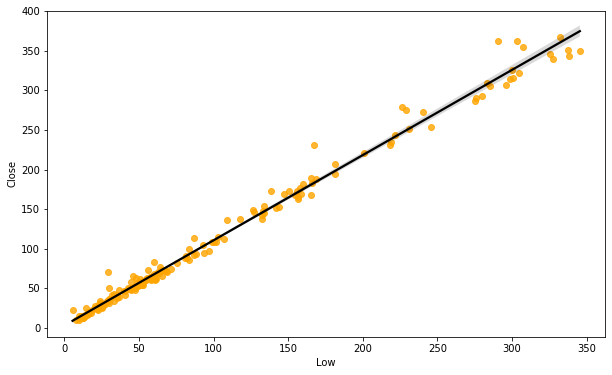

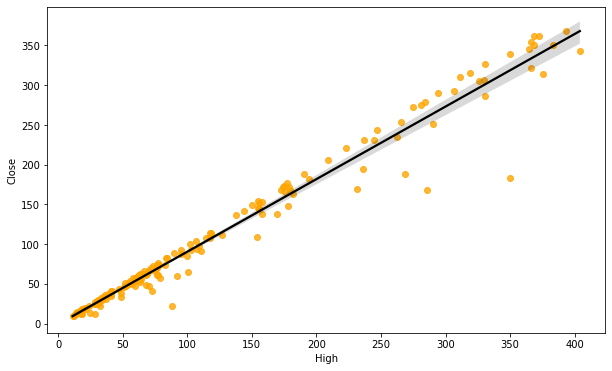

In [25]:
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Close'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

**From the above regression plot of all numerical features we see that the columns 'low', 'high', 'Open' are positively relation to the target variable.**

**which means the Close increases with increase of these features.**

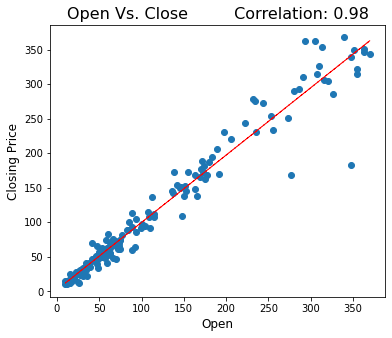

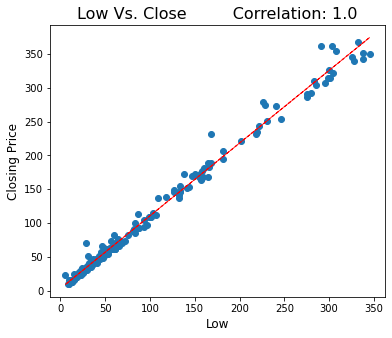

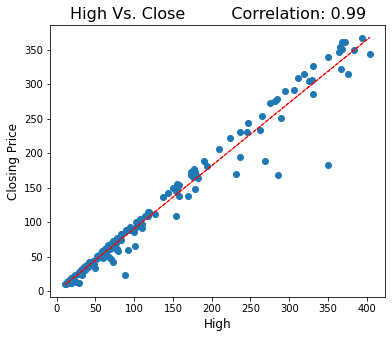

In [26]:
# Now to plot scatter plot with best fit line.
for col in numerical_features:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)